In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
import pickle


In [16]:
import sklearn
print(sklearn.__version__)

1.1.2


In [2]:
test=pd.read_csv('KITAI_Dataset_2/test/_annotations.csv')
train=pd.read_csv('KITAI_Dataset_2/train/_annotations.csv')
valid=pd.read_csv('KITAI_Dataset_2/valid/_annotations.csv')

: 

In [4]:
test

,filename,width,height,class,xmin,ymin,xmax,ymax
0,Tincion_Cut_Training_mp4-31_jpg.rf.5b3d92b5d2e...,1920,1080,cyanobacteria,8,243,68,303
1,Tincion_Cut_Training_mp4-31_jpg.rf.5b3d92b5d2e...,1920,1080,cumulus,561,253,696,350
2,Tincion_Cut_Training_mp4-31_jpg.rf.5b3d92b5d2e...,1920,1080,cyanobacteria,1226,338,1355,455
3,Tincion_Cut_Training_mp4-31_jpg.rf.5b3d92b5d2e...,1920,1080,cyanobacteria,358,913,446,995
4,Tincion_Cut_Training_mp4-31_jpg.rf.5b3d92b5d2e...,1920,1080,cyanobacteria,21,975,106,1053
...,...,...,...,...,...,...,...,...
163,Tincion_Cut_Training_mp4-97_jpg.rf.bd6821d7b4e...,1920,1080,cyanobacteria,149,807,269,914
164,Tincion_Cut_Training_mp4-97_jpg.rf.bd6821d7b4e...,1920,1080,cumulus,274,818,391,920
165,Tincion_Cut_Training_mp4-97_jpg.rf.bd6821d7b4e...,1920,1080,cyanobacteria,311,18,375,77
166,Tincion_Cut_Training_mp4-97_jpg.rf.bd6821d7b4e...,1920,1080,cyanobacteria,518,334,599,405


In [5]:
def crop_image (image_path, xmin, xmax, ymin, ymax):
        im=cv.imread(image_path)
        crop_img=im[ymin:ymax, xmin:xmax]
        resize= cv.resize(crop_img, (10,10),interpolation=cv.INTER_AREA).flatten()
        return resize.tolist()

In [6]:
X_test=[]
Y_test=[]
for index,row in test.iterrows():
    X_test.append(crop_image('KITAI_Dataset_2/test/'+str(row['filename']),row['xmin'],row['xmax'],row['ymin'],row['ymax']))
    if row['class']=='cyanobacteria':
        Y_test.append(0)
    else:
        Y_test.append(1)

In [7]:
X_train=[]
Y_train=[]
for index,row in train.iterrows():
    try:
        X_train.append(crop_image('KITAI_Dataset_2/train/'+str(row['filename']),row['xmin'],row['xmax'],row['ymin'],row['ymax']))
        if row['class']=='cyanobacteria':
            Y_train.append(0)
        else:
            Y_train.append(1)
    except:
        pass

In [8]:
X_valid=[]
Y_valid=[]
for index,row in valid.iterrows():
    try:
        X_valid.append(crop_image('KITAI_Dataset_2/valid/'+str(row['filename']),row['xmin'],row['xmax'],row['ymin'],row['ymax']))
        if row['class']=='cyanobacteria':
            Y_valid.append(0)
        else:
            Y_valid.append(1)
    except:
        pass

In [9]:
X_test=np.array(X_test)
Y_test=np.array(Y_test)
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_valid=np.array(X_valid)
Y_valid=np.array(Y_valid)

In [10]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
print(model)

RandomForestClassifier()


In [11]:
saved_model = pickle.dumps(model)
  
# Load the pickled model
rf_from_pickle = pickle.loads(saved_model)
  
# Use the loaded pickled model to make predictions
rf_from_pickle.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1])

In [12]:
from joblib import Parallel, delayed
import joblib

In [13]:
# Save the model as a pickle in a file
joblib.dump(model, 'random_forest.pkl')
  
# Load the model from the file
rf_from_joblib = joblib.load('random_forest.pkl')
  
# Use the loaded model to make predictions
rf_from_joblib.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1])

In [14]:
!python convert_weight.py --repo ~/stylegan2 stylegan2-ffhq-config-f.pkl

python: can't open file 'c:\\Users\\ccana\\Documents\\Kitai\\KITAI_v2.0\\convert_weight.py': [Errno 2] No such file or directory


In [13]:
expected_y  = Y_test
predicted_y = model.predict(X_test)

In [14]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       142
           1       0.92      0.85      0.88        26

    accuracy                           0.96       168
   macro avg       0.94      0.92      0.93       168
weighted avg       0.96      0.96      0.96       168

[[140   2]
 [  4  22]]


In [15]:
print("RMSE DT:",np.sqrt(mean_squared_error(Y_test, predicted_y)))
print("R2 DT:",r2_score(Y_test, predicted_y))
predictions = np.mean(cross_validate(model,X_test,Y_test,cv=100)['test_score'])
print('The accuracy is (cross validation*100): ',predictions*100,'%')

RMSE DT: 0.1889822365046136
R2 DT: 0.7269772481040087


C:\Users\ccana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 26 members, which is less than n_splits=100.
  warnings.warn(


The accuracy is (cross validation*100):  95.5 %


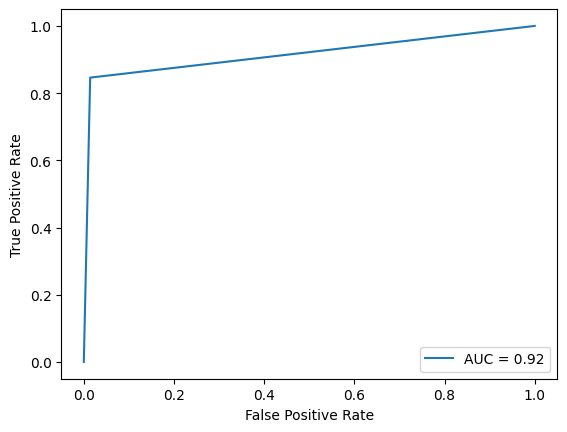

In [16]:
fpr, tpr, _ = roc_curve(Y_test, predicted_y)
roc_pls = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr))
roc_pls.plot()
plt.show()

In [17]:
y_valid=model.predict(X_valid)

In [18]:
print(metrics.classification_report(Y_valid,y_valid))
print(metrics.confusion_matrix(Y_valid, y_valid))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       234
           1       0.94      0.87      0.90        69

    accuracy                           0.96       303
   macro avg       0.95      0.93      0.94       303
weighted avg       0.96      0.96      0.96       303

[[230   4]
 [  9  60]]


In [19]:
print("RMSE DT:",np.sqrt(mean_squared_error(Y_valid, y_valid)))
print("R2 DT:",r2_score(Y_valid, y_valid))
predictions = np.mean(cross_validate(model,X_valid,Y_valid,cv=100)['test_score'])
print('Cross Validation:', predictions)
print('The accuracy is: ',predictions*100,'%')

RMSE DT: 0.20713350870644495
R2 DT: 0.7560386473429952


C:\Users\ccana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 69 members, which is less than n_splits=100.
  warnings.warn(


Cross Validation: 0.9366666666666668
The accuracy is:  93.66666666666667 %


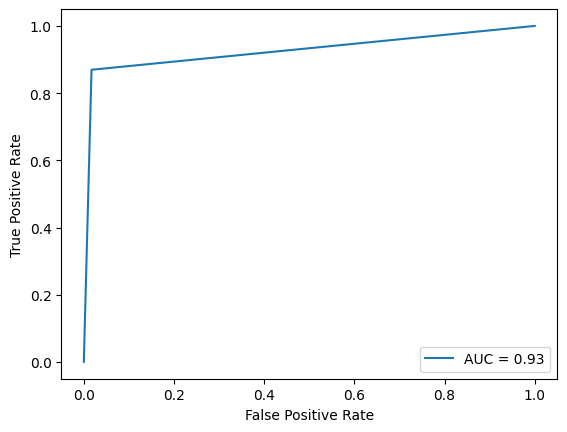

In [20]:
fpr, tpr, _ = roc_curve(Y_valid, y_valid)
roc_pls = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr))
roc_pls.plot()
plt.show()

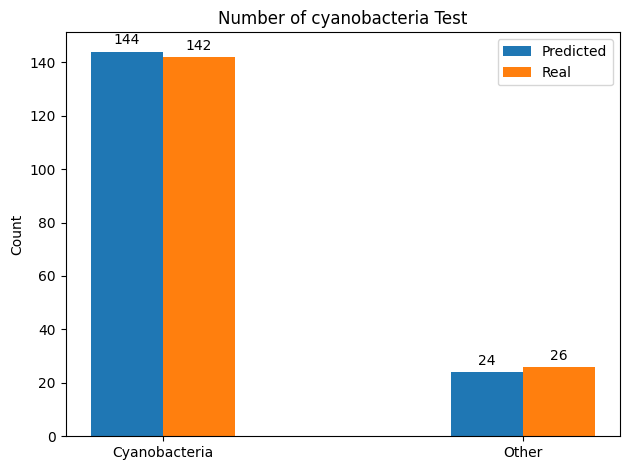

In [21]:
y_pred_list= predicted_y.tolist()
Y_test_list=Y_test.tolist()

labels = ['Cyanobacteria', 'Other']
predicted = [y_pred_list.count(0),y_pred_list.count(1)]
real=[Y_test_list.count(0),Y_test_list.count(1)]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, predicted, width, label='Predicted')
rects2 = ax.bar(x + width/2, real, width, label='Real')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Number of cyanobacteria Test')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

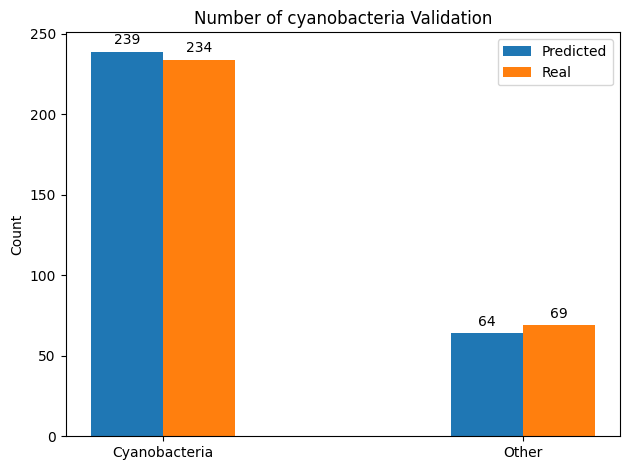

In [22]:
y_valid_list= y_valid.tolist()
Y_valid_list=Y_valid.tolist()

labels = ['Cyanobacteria', 'Other']
predicted_v = [y_valid_list.count(0),y_valid_list.count(1)]
real_v=[Y_valid_list.count(0),Y_valid_list.count(1)]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, predicted_v, width, label='Predicted')
rects2 = ax.bar(x + width/2, real_v, width, label='Real')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Number of cyanobacteria Validation')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()